In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import matplotlib.colors as col
import random
from statistics import mode
import copy

Note: In Gill's paper, all initialized points were taken in the region $\{(x,y)\;|\;x,y\in[-4,4]\}$

In [ ]:
#bounds
xbound = [-4, 4]
ybound = [-4, 4]

In [ ]:
def penalizer(func, x):
  if x.ndim == 2:
    fx = []
    for l in range(len(x[0])):
      if x[0][l]>=xbound[0] and x[0][l]<=xbound[1] and x[1][l]>=ybound[0] and x[1][l]<=ybound[1]:
        fx.append(func([x[0][l], x[1][l]]))
      else:
        fx.append(1000)
    return np.array(fx)
  elif x.ndim == 3:
    n = len(xy_stack[0])
    z = np.zeros((n,n))
    xs = x[0][0]
    ys = np.transpose(x[1])[0]
    for i in range(n): #select row (y-val)
      for l in range(n): #select column (x-val)
        if xs[l] < xbound[0] or xs[l] > xbound[1] or ys[i] < ybound[0] or ys[i] > ybound[1]:
          z[i][l] = 1000
        else:
          z[i][l] = func([xs[l], ys[i]])

In [ ]:
def f(x):
  #function 4 from Gill's paper
  return x[0]*np.sin(x[0]) + x[1]*np.sin(x[1])

In [ ]:
def g(x):
  #function 1 from Gill's paper
  return np.sin(x[0])*np.cos(x[1]) + np.cos(x[1])**2

In [ ]:
def h(x):
  #function 2 from Gill's paper
  return (1 + 4*(x[0]**2 + (x[1] - 1)**2))*(x[0]**2 + (x[1] + 1)**2)/4

In [ ]:
def j(x):
  #function 3 from Gill's paper
  return (x[0] - x[1] - 4)**2

In [ ]:
def l(x):
  #Rosenbrock
  a = 1; b = 1
  return (a-x[0]**2) + b*(x[1]-x[0]**2)**2

In [ ]:
def k(x):
  #function 2 from Sonia's paper
  return 2*x[0]**2 - 4*x[0]*x[1] + x[1]**4 + 2

In [ ]:
def o(x):
  return x[0]*x[1]

In [ ]:
# Create meshgrid objects for contour
x = np.linspace(xbound[0]-0.5,xbound[1]+0.5,100)
y = np.linspace(ybound[0]-0.5,ybound[1]+0.5,100)
#x = np.linspace(-4,4,100)
#y = np.linspace(-4,4,100)
X, Y = np.meshgrid(x, y)
xy_stack = np.stack((X,Y))

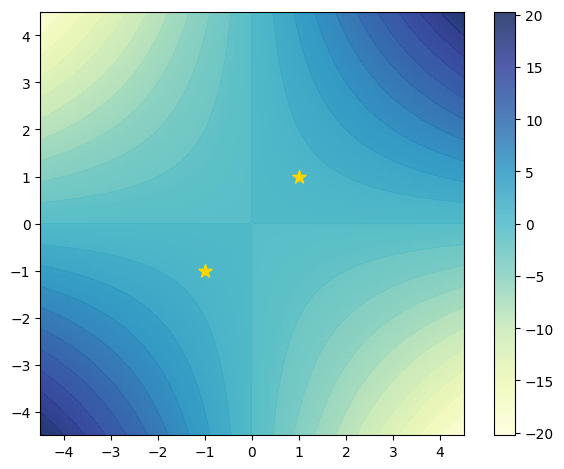

In [ ]:
# Create contour plot for function:
Z = f(xy_stack)
fig, ax = plt.subplots()
fig.set_tight_layout(True)
img = ax.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], origin='lower', cmap='YlGnBu', alpha=0.8)
fig.colorbar(img, ax=ax)
ax.contourf(X, Y, Z, levels = 20, alpha = 0.5, cmap = 'YlGnBu')
#ax.contour(X, Y, Z, levels = 12, alpha = 0.5)

# rect = pat.Rectangle((xbound[0], ybound[0]), xbound[1]-xbound[0], ybound[1]-ybound[0], linewidth=3, aa = True, edgecolor='navy', linestyle = '--', alpha = 0.8, facecolor='None')
# ax.add_patch(rect)

#ax.scatter(P[0],P[1], color = 'black', s = 5)
ax.scatter(-1, -1, marker = '*', s = 100, color = 'gold')
ax.scatter(1, 1, marker = '*', s = 100, color = 'gold')
#ax.plot(xx, yy, color = 'gold')
#for i in test:
   #ax.scatter(i[0],i[1],marker = '*', c = 'gold', ec = 'black', s = 150)

#swarm position and vectors
# ax.quiver(P[0], P[1], S[0], S[1], color = '#1f77b4', width=0.005, headlength = 4, angles='xy', scale_units='xy', scale=0.6, alpha = 0.7)
# ax.scatter(P[0], P[1], ec = 'gainsboro')

# ax.set_title('Contour of $(x - y - 4)^2$')
#ax.set_title('Contour of $\\frac{1}{4}(1 + 4(x^2 + (y - 1)^2))(x^2 + (y + 1)^2)$')
#ax.set_title('Initialized Swarm in $x_1\cdot\sin(x_1) + x_2\cdot\sin(x_2)$')
#ax.set_title('Initialized Swarm in $\sin(x_1)\cdot\cos(x_2) + \cos^2(x_2)$')
#ax.clabel(cs, inline=True, fontsize=10)

In [ ]:
def Spawner(n, xbounds, ybounds):
  vel_scale = 0.2
  width = xbounds[1] - xbounds[0]
  length = ybounds[1] - ybounds[0]

  X = np.random.rand(2, n)
  X[0] *= width; X[1] *= length
  X += np.array([[xbounds[0]],[ybounds[0]]])

  V = np.random.randn(2, n)
  V[0] *= width * vel_scale
  V[1] *= length * vel_scale
  return X, V

Update Formula: $X(t+1) = X(t) + V(t+1), V(t+1) = wV(t) + c_1r_1(P_\text{best} - X(t)) + c_2r_2(G_\text{best}-X(t))$

inertia $w\in(-1,1)$, learning factors $c_1,c_2 \ni 0 < c_1+c_2 < 4(1+w).$ Random rate $r_1, r_2 \in [0,1]$,

In [ ]:
#Create V(t)
def Update_Velocity(X, V, Pbest, Gbest, c, dynamic):
  if dynamic == 0:
    w = 1; c1 = 1.5; c2 = 0.2; r1 = random.random(); r2 = random.random()

  elif dynamic == 1:
    w = 1; c1 = 0.5 - 0.005*c; c2 = 0.2 + 0.005*c; r1 = random.random(); r2 = random.random()

  elif dynamic == 2:
    w = 1 - 0.01*c; c1 = 0.2; c2 = 0.2; r1 = random.random(); r2 = random.random()

  V = w*V + c1*r1*(Pbest - X) + c2*r2*(Gbest.reshape(-1,1) - X)
  return V

In [ ]:
def Particle_Swarm(X, V, func = f, pen = 0, iter = 60, want_Gbs = 0, dynamic = 0):
  pos = np.copy(X)
  vel = np.copy(V)
  Pb = np.copy(pos)
  if pen == 1:
    Pb_f = penalizer(func,Pb)
  else:
    Pb_f = func(Pb)
  Gb = Pb[:, Pb_f.argmin()]
  Gb_list = [np.copy(Gb)]
  #Gb_f = Pb_f.min()
  c = 0
  while c < iter:
    vel = Update_Velocity(pos, vel, Pb, Gb, c, dynamic)
    #print(V[0][0])
    pos += vel
    if pen == 1:
      delta = penalizer(func, pos) - Pb_f
    else:
      delta = func(pos) - Pb_f
    for i in range(0, len(pos[0])):
      if delta[i] < 0:
        Pb[0][i] = pos[0][i]
        Pb[1][i] = pos[1][i]
    if pen == 1:
      Pb_f = penalizer(func,Pb)
    else:
      Pb_f = func(Pb)
    Gb = Pb[:, Pb_f.argmin()]
    Gb_list.append(np.copy(Gb))
    #gbest = Pb[:, Pb_f.argmin()]
    #Gb_f = Pb_f.min()
    # print(Gb_f)
    # if c%5 ==0:
    #   plt.scatter(pos[0], pos[1])
    c+=1

  if want_Gbs == 1:
    return Gb_list
  else:
    return Gb

In [ ]:
# Same method but outputs position and velocity vectors at every iteration
def Particle_Swarm_Evolve(X, V, func = f, pen = 0, iter = 60, dynamic = 0):
  pos = np.copy(X)
  vel = np.copy(V)
  Pb = np.copy(pos)
  xb = [min(Pb[0]), max(Pb[0])]; yb = [min(Pb[1]), max(Pb[1])]
  if pen == 1:
    Pb_f = penalizer(func,Pb)
  else:
    Pb_f = func(Pb)
  Gb = Pb[:, Pb_f.argmin()]
  Gb_i = np.copy(Gb)
  Gb_f = Pb_f.min()
  c = 0
  xlist = [np.copy(pos[0])]; ylist = [np.copy(pos[1])]
  Vx = [np.copy(vel[0])]; Vy = [np.copy(vel[1])]
  while c < iter:
    vel = Update_Velocity(pos, vel, Pb, Gb, c, dynamic)
    pos += vel
    if pen == 1:
      delta = penalizer(func, pos) - Pb_f
    else:
      delta = func(pos) - Pb_f
    for i in range(0, len(pos[0])):
      if delta[i] < 0:
        Pb[0][i] = pos[0][i]
        Pb[1][i] = pos[1][i]
    if min(Pb[0]) < xb[0]:
      xb[0] = min(Pb[0])
    if max(Pb[0]) > xb[1]:
      xb[1] = max(Pb[0])
    if min(Pb[1]) < yb[0]:
      yb[0] = min(Pb[1])
    if max(Pb[1]) > yb[1]:
      yb[1] = max(Pb[1])
    if pen == 1:
      Pb_f = penalizer(func,Pb)
    else:
      Pb_f = func(Pb)
    Gb = Pb[:, Pb_f.argmin()]
    Gb_f = Pb_f.min()
    #print(Gb_f)
    if c%3 ==0:
      xlist.append(np.copy(pos[0])); ylist.append(np.copy(pos[1]))
      Vx.append(np.copy(vel[0])); Vy.append(np.copy(vel[1]))
    c+=1
  # plt.xlim(0, 25)
  # plt.ylim(0, 25)
  # plt.plot()
  # print(Gb)
  return xb, yb, xlist, ylist, Vx, Vy, Gb_i, Gb

In [ ]:
  def make_plot(xb, yb, xlist, ylist, Vx, Vy, gb_i, gb_f, f = f):
  n = 100
  xb1 = xb[0] - 0.15*abs(xb[0]); xb2 = xb[1]+ 0.15*abs(xb[1])
  yb1 = yb[0] - 0.15*abs(yb[0]); yb2 = yb[1]+ 0.15*abs(yb[1])
  x = np.linspace(xb1, xb2, n)
  y = np.linspace(yb1, yb2, n)
  X, Y = np.meshgrid(x, y)
  xy_stack = np.stack((X,Y))
  Z = f(xy_stack)

  fig, ax = plt.subplots()
  fig.set_tight_layout(True)
  img = ax.imshow(Z, extent=[xb1, xb2, yb1, yb2], origin='lower', cmap='YlGnBu', alpha=0.8)
  fig.colorbar(img, ax=ax)
  ax.contourf(X, Y, Z, levels = 30, cmap = 'YlGnBu')

  rect = pat.Rectangle((xbound[0], ybound[0]), xbound[1]-xbound[0], ybound[1]-ybound[0], linewidth=3, aa = True, edgecolor='navy', linestyle = '--', alpha = 0.8, facecolor='None')
  ax.add_patch(rect)

  colors = [col.to_hex(plt.cm.tab10(i)) for i in range(len(xlist))]
  for i in range(len(xlist)-1):
    ax.scatter(xlist[i], ylist[i], color = colors[i], ec = 'gainsboro')
    ax.quiver(xlist[i], ylist[i], Vx[i+1], Vy[i+1], color = colors[i], width=0.005, angles='xy', scale_units='xy', scale=1.5, alpha = 0.7)
  #ax.scatter(gb_i[0], gb_i[1], marker = '*', s = 100, color = 'blue', ec = 'black')
  ax.scatter(gb_f[0], gb_f[1], marker = '*', s = 150, color = 'gold', ec = 'black')


  ax.set_xlim(xb1,xb2); ax.set_ylim(yb1,yb2)

In [ ]:
xb, yb, xlist, ylist, vx, vy, gb_i, gb_f = Particle_Swarm_Evolve(P, S, f, pen=1, dynamic = 0)
print(gb_f)

In [ ]:
#xlist = xlist[::3]; ylist = ylist[::3]; vx = vx[::3]; vy = vy[::3];
trim = 3
starter = 0
stopper = 61

[-3.64579447  3.93355315]


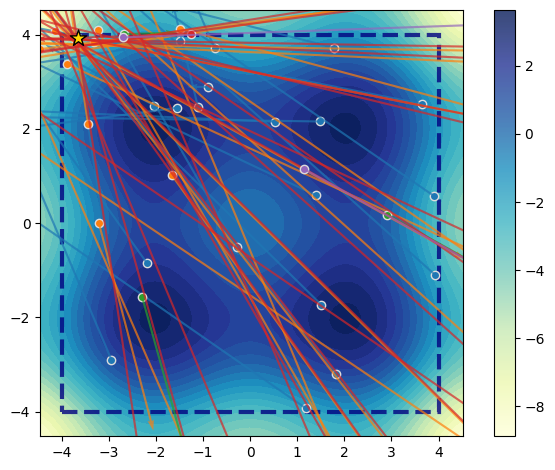

In [ ]:
#Plots swarm convergence with quiver
make_plot(xb, yb, xlist[starter:stopper:trim], ylist[starter:stopper:trim], vx[starter:stopper:trim], vy[starter:stopper:trim], gb_i, gb_f, f)
print(gb_f)

idea: let initial global best coordinate represent swarm

In [ ]:
#Collect gbs from 100 runs with this P
#g_min = P[:, f(P).argmin()]
r = np.zeros((2,50))
#results = np.zeros((50,2))
for i in range(50):
  k = Particle_Swarm(P, S, g_pen)
  r[0][i] = k[0]; r[1][i] = k[1]
g_min

array([3.72947502, 3.24266172])

In [ ]:
#test bounds
xb1 = min([min(r[0]), g_min[0]]); xb2 = max([max(r[0]), g_min[0]])
yb1 = min([min(r[1]), g_min[1]]); yb2 = max([max(r[1]), g_min[1]])

In [ ]:
delta = 0.025
#x = np.arange(xb1, xb2, delta)
#y = np.arange(yb1, yb2, delta)
X, Y = np.meshgrid(x, y)
xy_stack = np.stack((X,Y))
Z = g(xy_stack)

In [ ]:
Z = g(xy_stack)

Text(0.5, 1.0, 'Swarm Convergence Density of $\\cos(x_1)\\cdot\\sin(x_1) + \\cos^2(x_2)$')

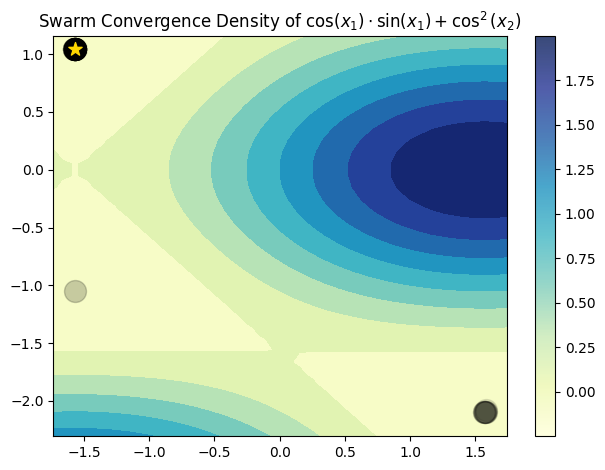

In [ ]:
## Density Maps
best_min = r[:, g(r).argmin()]
fig, ax = plt.subplots()
fig.set_tight_layout(True)
#img = ax.imshow(Z, extent=[xb1, xb2, yb1, yb2], origin='lower', cmap='YlGnBu', alpha=0.8)
fig.colorbar(img, ax=ax)
ax.contourf(X, Y, Z, levels = 10, cmap = 'YlGnBu')
#Plotting the density
ax.set_xlim(max([min(r[0])-abs(min(r[0]))*0.1, -4]), min([max(r[0])+abs(max(r[0]))*0.1, 4]))
ax.set_ylim(max([min(r[1])-abs(min(r[1]))*0.1, -4]), min([max(r[1])+abs(max(r[1]))*0.1, 4]))
plt.scatter(r[0], r[1], color = 'black', s = 250, alpha = 5/len(r[0]))
ax.scatter(g_min[0], g_min[1], marker = '*', s = 100)
ax.scatter(best_min[0], best_min[1], color = 'gold', marker = '*', s = 100)
#ax.set_title('Swarm Convergence Density of $x_1\cdot\sin(x_1) + x_2\cdot\sin(x_2)$')
ax.set_title('Swarm Convergence Density of $\cos(x_1)\cdot\sin(x_1) + \cos^2(x_2)$')
#ax.clabel(cs, inline=True, fontsize=10)

In [ ]:
list4 = []
for i in range(1000):
  P,S = Spawner(20,xbound, ybound)
  if i%100 == 0:
    print(P[0][0])
  list4.append(Particle_Swarm(P,S,pen = 1))

In [ ]:
listofx = []
listofy = []
for i in list4:
  listofx.append(list4[0]); listofy.append(list4[1])

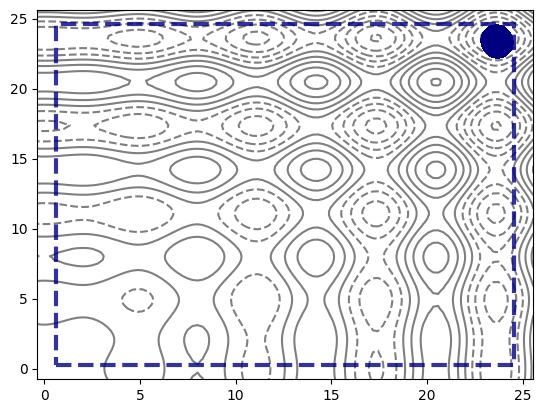

In [ ]:
x = np.linspace(xb[0]-1,xb[1]+1,100)
y = np.linspace(yb[0]-1,yb[1]+1,100)
X, Y = np.meshgrid(x, y)
xy_stack = np.stack((X,Y))
Z = f(xy_stack)

fig, ax = plt.subplots()
ax.contour(X, Y, Z, levels = 10, colors = 'black', alpha = 0.5, zorder = -1)

rect = pat.Rectangle((xb[0], yb[0]), xb[1]-xb[0], yb[1]-yb[0], linewidth=3, aa = True, edgecolor='navy', linestyle = '--', alpha = 0.8, facecolor='None')
ax.add_patch(rect)
ax.autoscale(False)
ax.scatter(listofx, listofy, alpha = 0.002, s = 500, aa = True, c = 'navy', zorder = 1)

Basins

In [ ]:
#g
p = np.pi
#[pi/2, +-2pi/3] [-pi/2, +- pi/6] [4, +-1.1827278], [-4, +-1.9588648], [pi/2, +-4]
minimizers = [[p/2,4],[-4,1.9588648],[p/2,2*p/3],[-p/2,p/3],[4,1.1827278],[-p/2,-p/3],[4,-1.1827278],[-4, -1.9588648],[p/2,-2*p/3],[p/2,-4]]

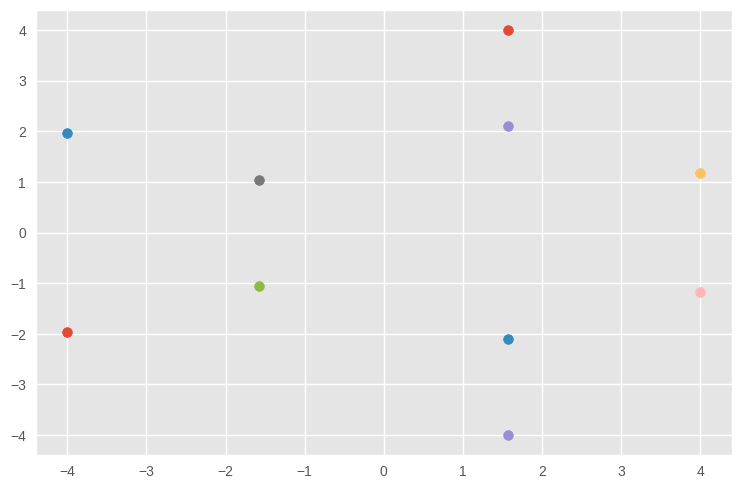

In [ ]:
for i in minimizers:
  plt.scatter(i[0],i[1])

In [ ]:
#f
minimizers = [[-4,4],[0,4],[4,4],[-4,0],[0,0],[4,0],[-4,-4],[0,-4],[4,-4]]

In [ ]:
#h
minimizers = [[0,-1],[0,1]]

In [ ]:
#k
minimizers = [[-1,-1],[1,1]]

In [ ]:
#j
minimizers = [[0,-4], [0.5, -3.5], [1, -3], [1.5, -2.5], [2, -2], [2.5, -1.5], [3, -1], [3.5, -0.5], [4,0]]

In [ ]:
def norm(x,y):
  return (x[0]-y[0])**2 + (x[1]-y[1])**2

In [ ]:
def get_minimizer(x, minimizers = minimizers):
  for i in range(1,len(minimizers)+1):
    if norm(x,minimizers[i-1]) < 0.0625:
      return i
  else:
    return 0

This tells us that this swarm evaluated with these params converges to within 0.25 units of the first minimizer (in this case $[-4,4]$).

In [ ]:
#The original Particle Swarm method returns just the final global best
Particle_Swarm(P,S,j,1)

array([ 1.8666816 , -2.13272219])

In [ ]:
#Given tile, make two swarms, run 5 PSOs on each, and give the most frequented minimizer
def tile_sorter(x, dx, dy, func, penalty):
  m = []
  P, S = Spawner(20,[x[0], x[0] + dx],[x[1], x[1] + dy])
  Q, T = Spawner(20,[x[0], x[0] + dx],[x[1], x[1] + dy])
  for i in range(5):
    gb1 = np.copy(Particle_Swarm(P,S, func, penalty))
    gb2 = np.copy(Particle_Swarm(Q,T, func, penalty))
    m.append(get_minimizer(gb1, minimizers))
    m.append(get_minimizer(gb2, minimizers))
  return mode(m)

For $\text{tiles}[0] = \begin{bmatrix}-4\\-4\end{bmatrix}$, tile sorter computes 10 particle swarm algorithms on the swarm spawned in the bottom-left tile ($x,y \in [-4,-3]$). It correctly gives us the the indices 7 for $(-4,-4)$ among the list of minimizers.

In [ ]:
def tile_plot(tiles, dx, dy, func, penalty = 0):
  #contour background
  x = np.linspace(xbound[0]-1,xbound[1]+1,100)
  y = np.linspace(ybound[0]-1,ybound[1]+1,100)
  X, Y = np.meshgrid(x, y)
  xy_stack = np.stack((X,Y))
  Z = func(xy_stack)

  fig, ax = plt.subplots()
  fig.set_tight_layout(True)
  img = ax.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], origin='lower', cmap='YlGnBu', alpha=0.8)
  fig.colorbar(img, ax=ax)
  ax.contourf(X, Y, Z, levels = 20, cmap = 'YlGnBu')

  colors = [col.to_hex(plt.cm.tab20(i)) for i in range(len(minimizers)+1)]
  col_list = []
  for tile in tiles:
    i = tile_sorter(tile, dx, dy, func, penalty)
    rect = pat.Rectangle((tile[0], tile[1]), dx, dy, edgecolor = 'white', linewidth = 0.5, facecolor = colors[-i], alpha = 0.65)
    ax.add_patch(rect)
    if i not in col_list:
      col_list.append(i)

  boundary = pat.Rectangle((-4, -4), 8, 8, linewidth= 2, edgecolor='black', facecolor='None')
  ax.add_patch(boundary)


  c = 0
  for i in col_list:
    if i != 0:
      plt.scatter(minimizers[i-1][0], minimizers[i-1][1], color = colors[-i], s = 150, edgecolor = 'white', linewidths = 1, marker = 'D',
                  label = str(minimizers[i-1][0]) + ',' + str(minimizers[i-1][1]))
    else:
      c += 1
  if c == 1:
    plt.scatter(100, 100, color = colors[0], s = 150, edgecolor = 'white', linewidths = 1, marker = 'D', label = 'Null')

  plt.xlim(xbound[0]-1, xbound[1]+1)
  plt.ylim(ybound[0]-1, ybound[1]+1)
  #fig.legend(loc = 'outside center left', title = 'Minima')
  #handles, labels = ax.get_legend_handles_labels()
  #ax.set_title('Grid-Initialization Basin Map for $x_1\cdot\sin(x_1) + x_2\cdot\sin(x_2)$')
  #ax.set_title('Grid-Initialization Basin Map for $\sin(x_1)\cdot\cos(x_2) + \cos^2(x_2)$')
  #ax.set_title('Grid-Initialization Basin Map for $\\frac{1}{4}\{1+4[x^2+(y-1)^2]\}[x^2+(y+1)^2]$')

In [ ]:
# Create an array of vectors corresponding to each bottom left corner of the tiles (total 64)
n = 16
delta_x = abs(xbound[0] - xbound[1])/n
delta_y = abs(ybound[0] - ybound[1])/n
x = np.arange(xbound[0], xbound[1], delta_x)
y = np.arange(ybound[0], ybound[1], delta_y)

tiles = []
for i in range(len(x)):
  for r in range(len(y)):
    tiles.append([x[i], y[r]])

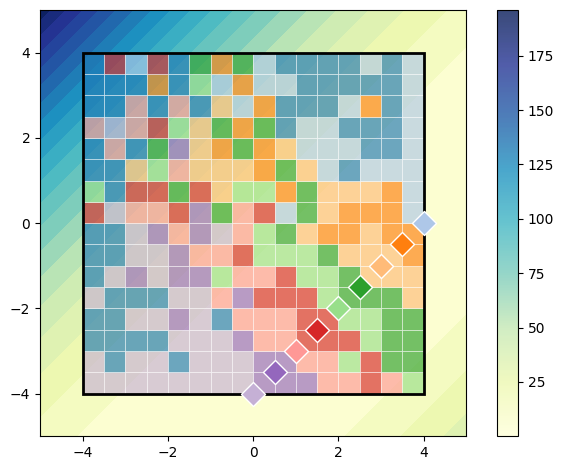

In [ ]:
tile_plot(tiles, delta_x, delta_y, j, 1)

In [ ]:
def tileplotj(tiles, dx, dy):
  x = np.linspace(xbound[0]-1,xbound[1]+1,100)
  y = np.linspace(ybound[0]-1,ybound[1]+1,100)
  X, Y = np.meshgrid(x, y)
  xy_stack = np.stack((X,Y))
  Z = j(xy_stack)

  fig, ax = plt.subplots()
  fig.set_tight_layout(True)
  img = ax.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], origin='lower', cmap='YlGnBu', alpha=0.8)
  fig.colorbar(img, ax=ax)
  ax.contourf(X, Y, Z, levels = 20, cmap = 'YlGnBu')

  colors = [col.to_hex(plt.cm.tab20(i)) for i in range(3)]
  print(colors)

  for tile in tiles:
    m = []
    P, S = Spawner(20,[x[0], x[0] + dx],[x[1], x[1] + dy])
    Q, T = Spawner(20,[x[0], x[0] + dx],[x[1], x[1] + dy])
    for i in range(5):
      gb1 = np.copy(Particle_Swarm(P,S, j, 1))
      gb2 = np.copy(Particle_Swarm(Q,T, j, 1))
      if (gb1[0] - gb1[1] - 4)**2 <= 0.5:
        m.append(1)
      else:
        m.append(0)
      if (gb2[0] - gb2[1] - 4)**2 <= 0.5:
        m.append(1)
      else:
        m.append(0)
    common = mode(m)

    rect = pat.Rectangle((tile[0], tile[1]), dx, dy, edgecolor = 'white', linewidth = 0.5, facecolor = colors[common+1], alpha = 0.65)
    ax.add_patch(rect)

  x2 = np.linspace(0, 4, 12)
  ax.scatter(x2, x2-4, color = colors[common+1], s = 75, marker = 'D', edgecolor = 'black')
  plt.xlim(xbound[0]-1, xbound[1]+1)
  plt.ylim(ybound[0]-1, ybound[1]+1)

['#1f77b4', '#aec7e8', '#ff7f0e']


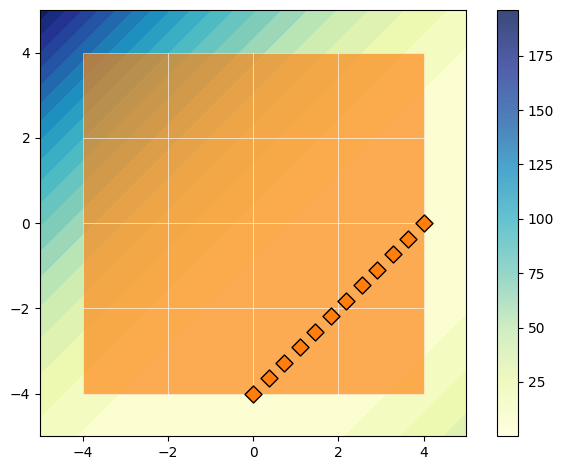

In [ ]:
tileplotj(tiles, delta_x, delta_y)

In [ ]:
colors = [col.to_hex(plt.cm.tab10(i)) for i in range(4)]

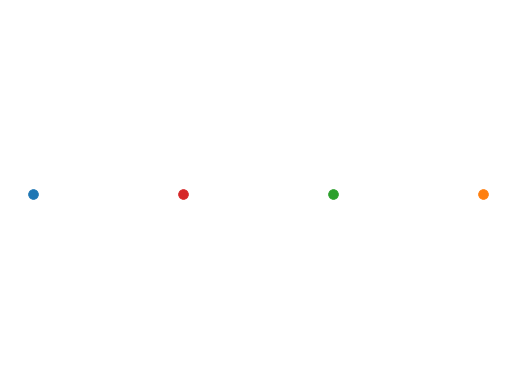

In [ ]:
for i in range(len(colors)):
  plt.grid(False)
  plt.axis('off')
  plt.scatter(i, 0, s = 50, c = colors[-i])

In [ ]:
def repeat_trials(f = f, xbound = xbound, ybound = ybound, trials = 50):
  gb_list = []
  for i in range(trials):
    P, S = Spawner(20, xbound, ybound)
    gb_list.append(np.copy(Particle_Swarm(P,S,f)))
  return gb_list

In [ ]:
list1 = repeat_trials(h_pen)

In [ ]:
l1x = []; l1y = []
for gb in list1:
  l1x.append(gb[0])
  l1y.append(gb[1])

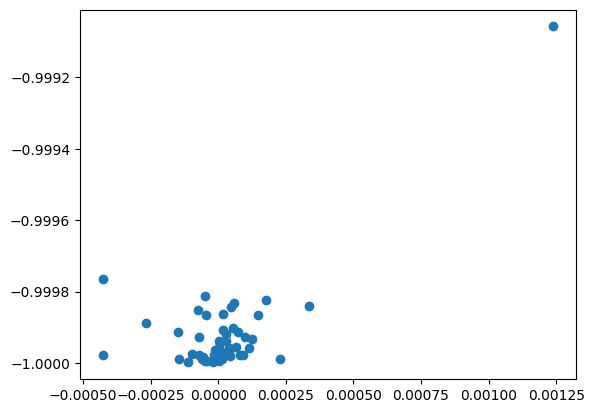

In [ ]:
plt.scatter(l1x,l1y)

In [ ]:
def heatmap(gbs, f = f):
  # x = np.linspace(xbound[0],xbound[1],100)
  # y = np.linspace(ybound[0]-0.25,ybound[1]+0.25,100)
  x = np.linspace(-0.5,0.5,100)
  y = np.linspace(ybound[0]-0.25,ybound[1]+0.25,100)
  X, Y = np.meshgrid(x, y)
  xy_stack = np.stack((X,Y))
  Z = f(xy_stack)

  fig, ax = plt.subplots()
  fig.set_tight_layout(True)
  img = ax.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], origin='lower', cmap='YlGnBu', alpha=0.8)
  fig.colorbar(img, ax=ax)
  ax.contourf(X, Y, Z, levels = 40, cmap = 'YlGnBu')

  l1x = []; l1y = []
  for gb in gbs:
    l1x.append(gb[0])
    l1y.append(gb[1])

  plt.scatter(l1x,l1y, s=100, c='red', alpha = 0.05)

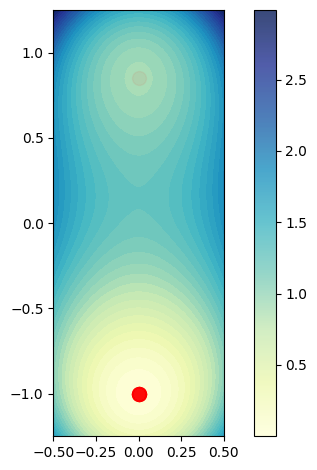

In [ ]:
heatmap(list1, h)

In [ ]:
gb, gbl = Particle_Swarm(P,S,h_pen, want_Gbs = 1, dynamic = 0)

In [ ]:
gbd1, gbld1 = Particle_Swarm(P,S,h_pen, want_Gbs = 1, dynamic = 1)

In [ ]:
gbd2, gbld2 = Particle_Swarm(P,S,h_pen, want_Gbs = 1, dynamic = 2)

In [ ]:
len(np.zeros(61))

61

In [ ]:
for entry in gbl:
  plt.scatter(entry[0], entry[1])

In [ ]:
def converging_rate(gbl):
  norms = []
  for entry in gbl:
    all_minimizer_norms =[]
    for i in minimizers:
      all_minimizer_norms.append(norm(i, entry))
    norms.append(min(all_minimizer_norms))
  distances = np.sqrt(norms)
  return distances

In [ ]:
def converging_rate_j(gbl):
  norms = []
  for entry in gbl:
    int_point = [(entry[0]+entry[1])/2 + 2,(entry[0]+entry[1])/2 - 2]
    norms.append(norm(entry, int_point))
  return np.sqrt(norms)

In [ ]:
def Convergence_Plots(func, dyn = 0):
  distances = np.zeros(61)
  for i in range(500):
    P,S = Spawner(20,xbound,ybound)
    Gbs = np.copy(Particle_Swarm(P, S, func, pen=1, want_Gbs = 1, dynamic = dyn))
    distances += converging_rate(Gbs)
  distances /= 500
  out_list = []
  out_list_iter = []
  far_list = []
  far_list_iter = []
  mid_list = []
  mid_list_iter = []
  near_list = []
  near_list_iter = []
  for i in range(60):
    if distances[i] >= 0.5:
      out_list.append(distances[i]); out_list_iter.append(i)

    if distances[i] < 0.5 and distances[i] >= 0.25:
      far_list.append(distances[i]); far_list_iter.append(i)

    if distances[i] < 0.25 and distances[i] >= 0.1:
      mid_list.append(distances[i]); mid_list_iter.append(i)

    if distances[i] < 0.1:
      near_list.append(distances[i]); near_list_iter.append(i)

  plt.plot(out_list_iter, out_list, linewidth = 3, aa = True, zorder = 1, label = 'beyond 0.5 units')

  if not far_list_iter == []:
    plt.plot(far_list_iter, far_list, linewidth = 3, aa = True, zorder = 2, label = 'between 0.5 & 0.25 units')
  if not mid_list_iter == []:
    plt.plot(mid_list_iter, mid_list, linewidth = 3, aa = True, zorder = 3, label = 'between 0.25 & 0.1 units')
  if not near_list_iter == []:
    plt.plot(near_list_iter, near_list, linewidth = 3, aa = True, zorder = 3, label = 'within 0.1 units')

  if not far_list_iter == []:
      plt.scatter(out_list_iter[-1], out_list[-1], c = 'mediumorchid', marker = 'D', ec = 'black', zorder = 5, s = 75, label = 'last iteration beyond 0.5 units')
      plt.plot([out_list_iter[-1],out_list_iter[-1]], [0, 2], c = 'mediumorchid', alpha = 0.4, label = '_hidden1')
      plt.plot([-3, 63], [out_list[-1], out_list[-1]], c = 'mediumorchid', alpha = 0.4, label = '_hidden2')
      print(out_list_iter[-1])
  if not mid_list_iter == []:
      plt.scatter(far_list_iter[-1], far_list[-1], c = 'royalblue', marker = 'D', ec = 'black', zorder = 5, s = 75, label = 'last iteration beyond 0.25 units')
      plt.plot([far_list_iter[-1],far_list_iter[-1]], [0, 2], c = 'royalblue', alpha = 0.4, label = '_hidden3')
      plt.plot([-3, 63], [far_list[-1], far_list[-1]], c = 'royalblue', alpha = 0.4, label = '_hidden4')
      print(far_list_iter[-1])
  if not near_list_iter == []:
      plt.scatter(mid_list_iter[-1], mid_list[-1], c = 'orange', marker = 'D', ec = 'black', zorder = 5, s = 75, label = 'last iteration beyond 0.1 units')
      plt.plot([mid_list_iter[-1],mid_list_iter[-1]], [0, 2], c = 'orange', alpha = 0.4, label = '_hidden5')
      plt.plot([-3, 63], [mid_list[-1], mid_list[-1]], c = 'orange', alpha = 0.4, label = '_hidden6')
      print(near_list_iter[-1])
  #plt.grid(axis = 'x', zorder = -2, which = 'both')
  plt.legend(labelcolor='linecolor')
  plt.xlabel('Iterations')
  plt.ylabel('Distance')
  plt.ylim(0,2)
  plt.xlim(-2.5,62.5)

In [ ]:
plt.style.use('ggplot')

In [ ]:
minimizers = [[4,4],[4,-4],[-4,4],[-4,-4]]

In [ ]:
p = np.pi
minimizers = [[p/2,2*p/3],[-p/2,p/3],[-p/2,-p/3],[p/2,-2*p/3]]

In [ ]:
minimizers = [[0,-1]]

In [ ]:
minimizers = [[-1,-1], [1,1]]

In [ ]:
#Create V(t)
def Update_Velocity(X, V, Pbest, Gbest, c, dynamic):
  if dynamic == 0:
    w = 0.9; c1 = .2; c2 = .2; r1 = random.random(); r2 = random.random()

  elif dynamic == 1:
    c1m = 0.8
    c2m = 0.2
    dif = c1m - c2m
    w = 1; c1 = c1m - dif/60*c; c2 = c2m + dif/60*c; r1 = random.random(); r2 = random.random()

  elif dynamic == 2:
    w = 1.2 - 0.02*c; c1 = 2.5; c2 = .5; r1 = random.random(); r2 = random.random()

  elif dynamic == 3:
    c1m = 2.5
    c2m = 0.5
    dif = c1m - c2m
    w = 1 - 0.01*c; c1 = c1m - dif/60*c; c2 = c2m + dif/60*c; r1 = random.random(); r2 = random.random()

  V = w*V + c1*r1*(Pbest - X) + c2*r2*(Gbest.reshape(-1,1) - X)
  return V

In [ ]:
P,S = Spawner(20, xbound, ybound)

In [ ]:
def Update_Velocity_2(X, V, w, c1, c2, d, Pbest, Gbest, c, dynamic):
  r1 = random.random(); r2 = random.random()
  if dynamic == 1:
    diff = c1 - c2
    c1 -= diff/60 * c; c2 += diff/60 * c
  elif dynamic == 2:
    w = w - d*c;
  elif dynamic == 3:
    diff = c1 - c2
    w = w - d*c; c1 -= diff/60 * c; c2 += diff/60 * c

  V = w*V + c1*r1*(Pbest - X) + c2*r2*(Gbest.reshape(-1,1) - X)
  return V

In [ ]:
def Spawner(n, xbounds, ybounds):
  vel_scale = 0.4

  width = xbounds[1] - xbounds[0]
  length = ybounds[1] - ybounds[0]

  X = np.random.rand(2, n)
  X[0] *= width; X[1] *= length
  X += np.array([[xbounds[0]],[ybounds[0]]])

  V = np.random.randn(2, n)
  V[0] *= width * vel_scale
  V[1] *= length * vel_scale
  return X, V

In [ ]:
def Spawner2(n, xbounds, ybounds, vs):
  vel_scale = vs

  width = xbounds[1] - xbounds[0]
  length = ybounds[1] - ybounds[0]

  X = np.random.rand(2, n)
  X[0] *= width; X[1] *= length
  X += np.array([[xbounds[0]],[ybounds[0]]])

  V = np.random.randn(2, n)
  V[0] *= width * vel_scale
  V[1] *= length * vel_scale
  return X, V

32
46


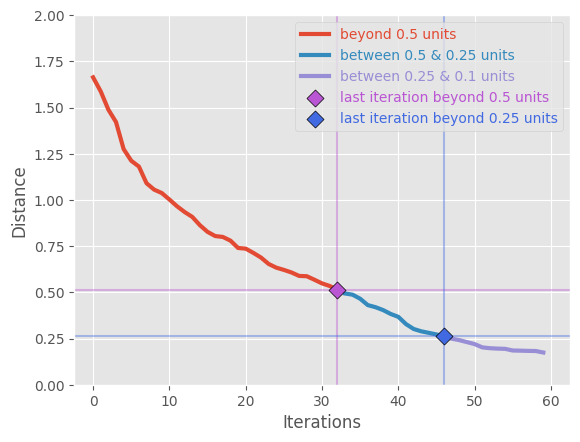

In [ ]:
Convergence_Plots(f, dyn = 2)

In [ ]:
def Particle_Swarm_2(X, V, w, c1, c2, decline_rate = 0.01, func = f, pen = 0, iter = 60, want_Gbs = 0, dynamic = 0):
  pos = np.copy(X)
  vel = np.copy(V)
  Pb = np.copy(pos)
  if pen == 1:
    Pb_f = penalizer(func,Pb)
  else:
    Pb_f = func(Pb)
  Gb = Pb[:, Pb_f.argmin()]
  Gb_list = [np.copy(Gb)]
  c = 0
  while c < iter:
    vel = Update_Velocity_2(pos, vel, w, c1, c2, decline_rate, Pb, Gb, c, dynamic)
    pos += vel
    if pen == 1:
      delta = penalizer(func, pos) - Pb_f
    else:
      delta = func(pos) - Pb_f
    for i in range(0, len(pos[0])):
      if delta[i] < 0:
        Pb[0][i] = pos[0][i]
        Pb[1][i] = pos[1][i]
    if pen == 1:
      Pb_f = penalizer(func,Pb)
    else:
      Pb_f = func(Pb)
    Gb = Pb[:, Pb_f.argmin()]
    Gb_list.append(np.copy(Gb))
    c+=1

  if want_Gbs == 1:
    return Gb_list
  else:
    return Gb

In [ ]:
def Stacked_Plots(func, vs_vars = [0.2, 0.2, 0.2, 0.2], w_vars = [1, 1, 1, 1],
                  c1_vars = [0.2, 0.2, 0.2, 0.2], c2_vars = [0.2, 0.2, 0.2, 0.2],
                  decline_rates = [0.01, 0.01, 0.01, 0.01], dyn = 0):
  fig, ax = plt.subplots()
  #xticks = [0, 60]
  colors = [col.to_hex(plt.cm.tab20(2*i)) for i in range(4)]
  for i in range(4):
    distances = np.zeros(61)
    w = w_vars[i]
    c1 = c1_vars[i]
    c2 = c2_vars[i]
    vs = vs_vars[i]
    d = decline_rates[i]
    for j in range(500):
      P,S = Spawner2(20,xbound,ybound, vs)
      Gbs = np.copy(Particle_Swarm_2(P, S, w, c1, c2, d, func, pen=1, want_Gbs = 1, dynamic = dyn))
      distances += converging_rate(Gbs)
    distances /= 500
    #ax.plot(distances, linewidth = 3, aa = True, color = colors[i], label = 'VS = '+ str(vs) + ', $\omega$ = ' + str(w) + ', $c_1$ = ' + str(c1) + ', $c_2$ = ' + str(c2))
    ax.plot(distances, linewidth = 3, aa = True, color = colors[i], label = 'VS = '+ str(vs) + ', $\omega$ = ' + str(w) + ', $d$ = ' + str(d) + ', $c_1$ = ' + str(c1) + ', $c_2$ = ' + str(c2))

    # k = 0
    # l = 0
    # while k == 0 and l <= 60:
    #   if distances[l] < 0.5:
    #     k += 1
    #     ax.plot([l, l], [0, distances[l]], linewidth = 1, aa = True, linestyle = '--', c = colors[i], zorder = 0, alpha = 0.8, label = '_hidden1')
    #     xticks.append(l)
    #   else:
    #     l += 1

  ax.plot([-3,63], [.5, .5], linewidth = 1, linestyle = '--', color = 'mediumorchid', alpha = 0.8, zorder = 3, label = '_hidden1')
  ax.plot([-3,63], [.25, .25], linewidth = 1, linestyle = '--', color = 'royalblue', alpha = 0.8, zorder = 3, label = '_hidden2')
  ax.plot([-3,63], [.1, .1], linewidth = 1, linestyle = '--', color = 'orange', alpha = 0.8, zorder = 3, label = '_hidden3')

  ax.set_yticks([0, 0.1, 0.25, 0.5, 1])
  #ax.set_xticks(xticks)
  ax.legend(labelcolor='linecolor')
  ax.set_xlabel('Iterations')
  ax.set_ylabel('Distance')
  #ax.set_ylim(0,1)
  #ax.set_xlim(-2.5,62.5)
  ax.set_ylim(0,.6)
  ax.set_xlim(-2.5,17.5)

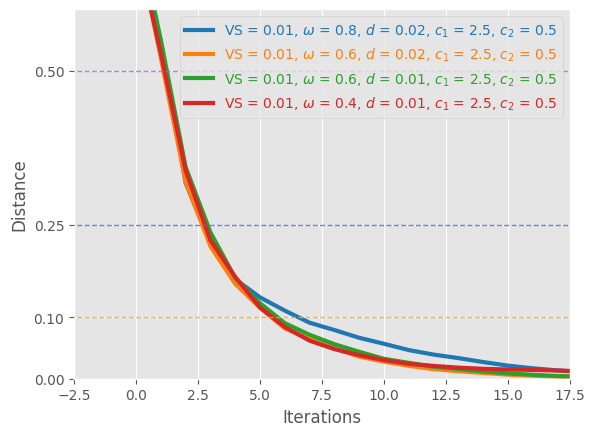

In [ ]:
Stacked_Plots(k, vs_vars = [0.01, 0.01, 0.01, 0.01], w_vars = [.8, .6, .6, .4], decline_rates = [0.02, 0.02, 0.01, 0.01], c1_vars = [2.5,2.5,2.5,2.5], c2_vars = [.5,.5,.5,.5], dyn = 3)